In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Position_Salaries.csv')
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

In [ ]:
print(x)
print(y)

In [6]:
yres = y.reshape(len(y),1)
print(yres)
# cond = np.concatenate([xres,yres],1)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [11]:
from base64 import standard_b64decode
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
xf= scx.fit_transform(x)
yf = scy.fit_transform(yres)

In [12]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
reg.fit(xf,yf)

c:\Users\Jana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [18]:
predy = reg.predict(scx.transform([[6.5]])) # since to tranform the value to the scaled one as of the trained data 

scy.inverse_transform([predy])


array([[170370.0204065]])

(1, 10)


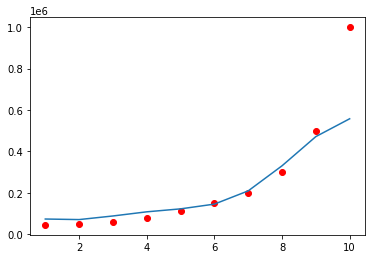

In [40]:
plt.scatter(x,y,color = 'red')
ytop = scy.inverse_transform([reg.predict(xf)])
print((ytop.shape))
plt.plot(x,ytop.reshape(len(ytop[0]),1))

(90, 1)
(90,)


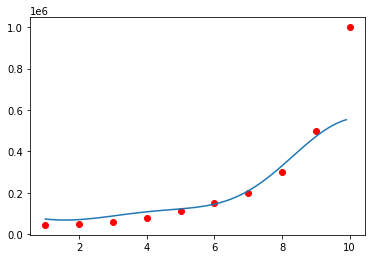

In [60]:

x_grid = np.arange(min(x),max(x),0.1)
# print(x_grid.shape)
x_grid = x_grid.reshape((len(x_grid),1))
print(x_grid.shape)
# print(xgrid.shape)
plt.scatter(x,y,color = 'red')
a = reg.predict(scx.transform(x_grid))
print(a.shape)
y_grid=scy.inverse_transform([a])
plt.plot(x_grid,y_grid.reshape(len(y_grid[0]),1))